**Loan Default Prediction using Classification Models**

# Deskripsi Project

Pada proyek ini, dilakukan analisis dan pemodelan data untuk memprediksi kemungkinan seseorang mengalami gagal bayar pinjaman (loan default). Dataset yang digunakan berisi informasi demografis peminjam, detail pinjaman, hingga histori kredit. Tujuan utama dari proyek ini adalah memilih model klasifikasi terbaik dari beberapa kandidat model untuk memaksimalkan performa prediksi terhadap status pinjaman. Untuk mencapai tujuan ini, dilakukan proses data preprocessing, eksplorasi data, feature engineering, dan pemodelan menggunakan beberapa algoritma machine learning. Setelah dilakukan evaluasi performa model, dipilih satu model terbaik berdasarkan hasil evaluasi.





# Import Library

In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# import metrics method for model evaluation
import sklearn.metrics as metrics

#import library for ML model
#import Logictic Regression
from sklearn.linear_model import LogisticRegression
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import xgboost classifier
from xgboost import XGBClassifier
#import lgbmboost classifier
from lightgbm import LGBMClassifier

# import dalex to explain complex model
import dalex as dx

import scikitplot as skplt

#Load Data

In [2]:
#read data and check the first 5 data
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1




*   person_age : Umur peminjam (dalam tahun)
*   person_gender : Jenis kelamin peminjam
* person_education : Tingkat pendidikan peminjam
* person_income : Penghasilan tahunan peminjam (dalam dolar)
* person_emp_exp : Lama pengalaman kerja (dalam tahun)
* person_home_ownership : Status kepemilikan tempat tinggal
* loan_amnt : Jumlah pinjaman yang diminta (dalam dolar)
* loan_intent : Tujuan pengajuan pinjaman
* loan_int_rate : Tingkat bunga tahunan dari pinjaman
* loan_percent_income : Persentase jumlah pinjaman terhadap pendapatan tahunan peminjam
* cb_person_credit_hist_length : Lama riwayat kredit yang tercatat dalam biro kredit (dalam tahun)
* credit_score : Skor kredit peminjam
* previous_loan_defaults_on_file : Indikator apakah peminjam pernah gagal bayar pinjaman sebelumnya (0 = tidak, 1 = ya)
* loan_status : Status pengajuan pinjaman





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  



*   Dataset terdiri dari 45.000 baris (entri) dan 14 kolom (fitur).
*   Beberapa kolom yang bertipe numerik : person_age, person_income, person_emp_exp, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score.
* Beberapa kolom yang bertipe kategorikal : person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file, loan_status.


# Data Cleaning & Manipulation

Pada tahap ini dilakukan proses pembersihan data untuk memastikan kualitas data yang digunakan optimal:

- Pemeriksaan missing values dan duplikasi
- Pembersihan nilai-nilai anomali
- Pengecekan tipe data dan konversi tipe bila diperlukan

In [4]:
#kelompokkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

In [5]:
#convert data type
df['person_age']=df['person_age'].astype(int)
df['person_income']=df['person_income'].astype(int)

In [6]:
#check missing values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Tidak ada nilai yang hilang

In [7]:
df.duplicated().sum()

0

Tidak ada nilai yang terduplikat

In [8]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Dari tabel diatas diperoleh bahwa :

* Umur Peminjam
  
  Rata-rata usia peminjam adalah 27 tahun dengan usia termuda adalah 20 tahun dan usia tertua adalah 144 tahun.

* Pendapatan Tahunan

  Rata-rata pendapatan peminjam adalah `$` 80 ribu per tahun dengan pendapatan terendah adalah `$` 8 ribu per tahun dan pendapatan tertinggi adalah `$` 7.2 juta per tahun

* Pengalaman Kerja

  Rata-rata lama pengalaman kerja peminjam adalah 5 tahun, dengan pengalaman kerja terendah adalah 0 tahun dan tertinggi mencapai 125 tahun.

* Jumlah Pinjaman
  
  Rata-rata jumlah pinjaman yang diminta adalah `$`9 ribu dengan nilai terkecil sebesar $500 dan terbesar sebesar `$`35 ribu.

* Tingkat Bunga Pinjaman

  Rata-rata tingkat bunga pinjaman adalah 11.01%, dengan tingkat bunga terendah sebesar 5.42% dan tertinggi sebesar 20%.

* Rasio Pinjaman terhadap Pendapatan

  Rata-rata rasio pinjaman terhadap pendapatan peminjam adalah 13.97%, dengan rasio terkecil sebesar 0% dan tertinggi sebesar 66%.

* Lama Riwayat Kredit
  
  Rata-rata lama riwayat kredit peminjam adalah 5,87 tahun, dengan riwayat terpendek 2 tahun dan terpanjang 30 tahun.

* Skor Kredit
  
  Rata-rata skor kredit peminjam adalah 632, dengan nilai skor terendah sebesar 390 dan tertinggi sebesar 850.

* Status Pengajuan Pinjaman

  Sebanyak 22% pengajuan pinjaman disetujui, sedangkan sisanya 78% ditolak.



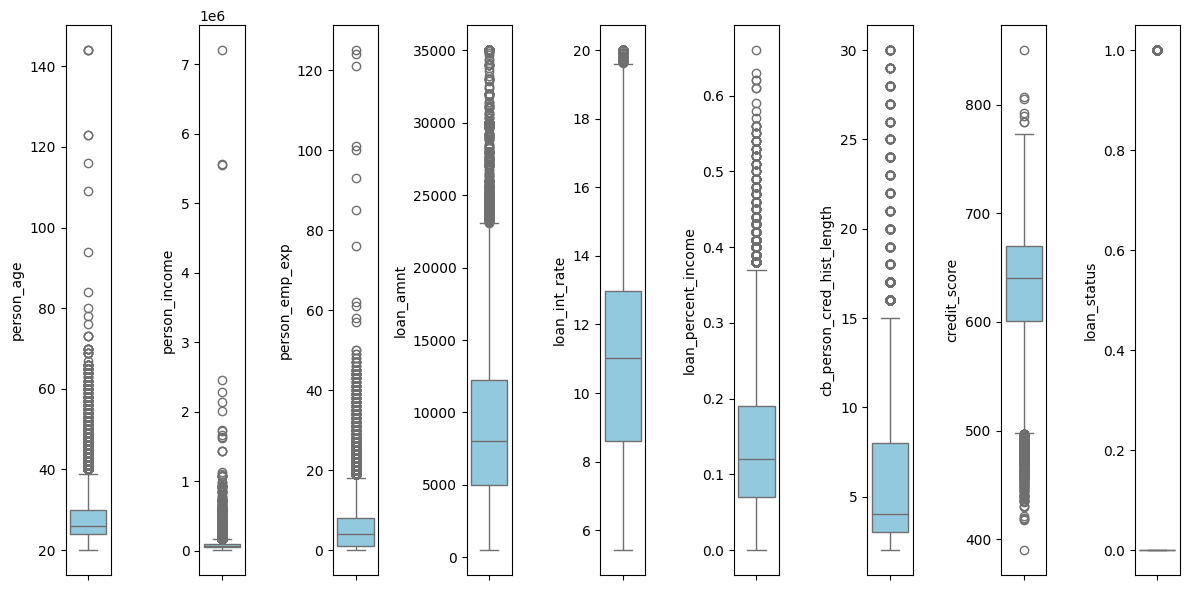

In [9]:
# cek outlier
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = num_cols
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

1. Usia Peminjam
- Mayoritas usia peminjam berada di rentang 20–40 tahun.
- Terdapat outlier dengan usia di atas 80 tahun, bahkan mencapai 144 tahun, yang tidak realistis.

2. Pendapatan Tahunan
- Distribusi sangat skewed ke kanan.
- Terdapat outlier ekstrem, menunjukkan adanya individu dengan pendapatan jauh di atas mayoritas (hingga lebih dari 7 juta dolar).

3. Pengalaman Kerja
- Banyak nilai berada di bawah 20 tahun pengalaman.
- Terdapat outlier ekstrem (hingga 125 tahun), yang tidak realistis.

4. Jumlah Pinjaman
- Distribusi cenderung normal dengan beberapa outlier di atas `$`25.000, namun masih wajar.

5. Tingkat Bunga
- Distribusi cukup rapat di rentang 5%–20%.
- Tidak ada outlier ekstrem, menunjukkan distribusi bunga yang terkendali.

6. Rasio Pinjaman terhadap Pendapatan
- Mayoritas berada di bawah 0.3 (30% dari pendapatan tahunan).
- Terdaat outlier di atas 0.5 yang mungkin berisiko tinggi.

7. Lama Riwayat Kredit
- Mayoritas memiliki riwayat kredit di bawah 10 tahun.- Ada outlier hingga lebih dari 25 tahun, namun masih wajar.

8. Skor Kredit
- Distribusi cukup normal.
- Pada umumnya rentang skor kredit 300-850.

9. Status Pinjaman
- Terlihat bahwa sebagian besar nilai adalah 0.
- Ini menunjukkan ketidakseimbangan kelas (mayoritas pinjaman ditolak).



In [10]:
# cek peminjam berumur diatas 80 tahun
df[df['person_age'] >= 80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144,male,Associate,241424,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123,female,High School,97140,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123,male,Bachelor,94723,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144,female,Associate,7200766,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94,male,High School,29738,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80,male,High School,77894,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84,male,High School,114705,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116,male,Bachelor,5545545,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109,male,High School,5556399,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [11]:
#check peminjam yang memiliki pengalaman kerja diatas 60 tahun
df[df['person_emp_exp'] > 60]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144,male,Associate,241424,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123,female,High School,97140,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123,male,Bachelor,94723,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144,female,Associate,7200766,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94,male,High School,29738,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80,male,High School,77894,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84,male,High School,114705,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116,male,Bachelor,5545545,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109,male,High School,5556399,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


- Terdapat 9 peminjam yang berusia dan pengalaman kerja tidak wajar
- 5 baris berusia lebih dari 120 tahun, yang kemungkinan besar salah input.
- Semua memiliki pengalaman kerja (person_emp_exp) sangat tidak realistis (di atas 60 tahun, bahkan sampai 125).
- Beberapa juga memiliki pendapatan yang sangat tinggi (> `$`5 juta)

In [12]:
#filter data untuk usia yang kurang dari 80 tahun
df = df[df['person_age'] < 80]

In [13]:
df['person_income'].max()

2448661

Pendapatan maksimal yaitu `$` 2 juta per tahun, dimana nilai tersebut wajar dalam kasus ini.

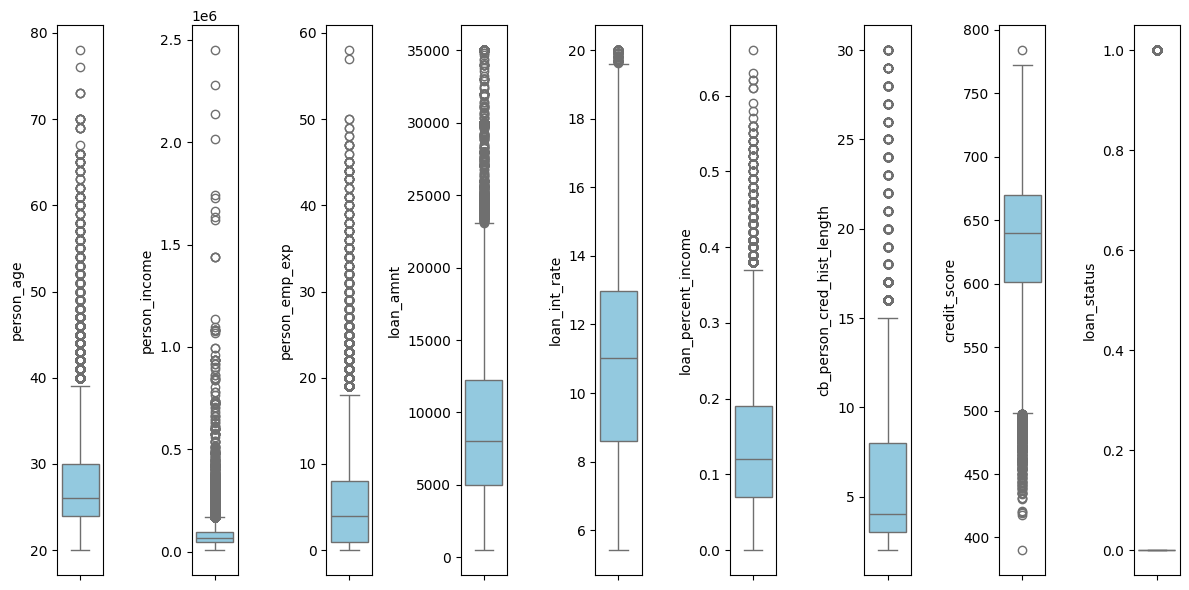

In [14]:
# cek outlier pada data yang baru
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = num_cols
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

# Exploratory Data Analysis

Tahap EDA bertujuan untuk memahami distribusi data dan hubungan antar fitur:

- Visualisasi distribusi target (loan_status)
- Analisis fitur kategorikal seperti person_home_ownership, person_education, dan loan_intent terhadap status pinjaman
- Analisis fitur numerik seperti loan_int_rate, credit_score, dan person_income

Text(0.5, 1.0, 'Distribusi Pengalaman Kerja Peminjam')

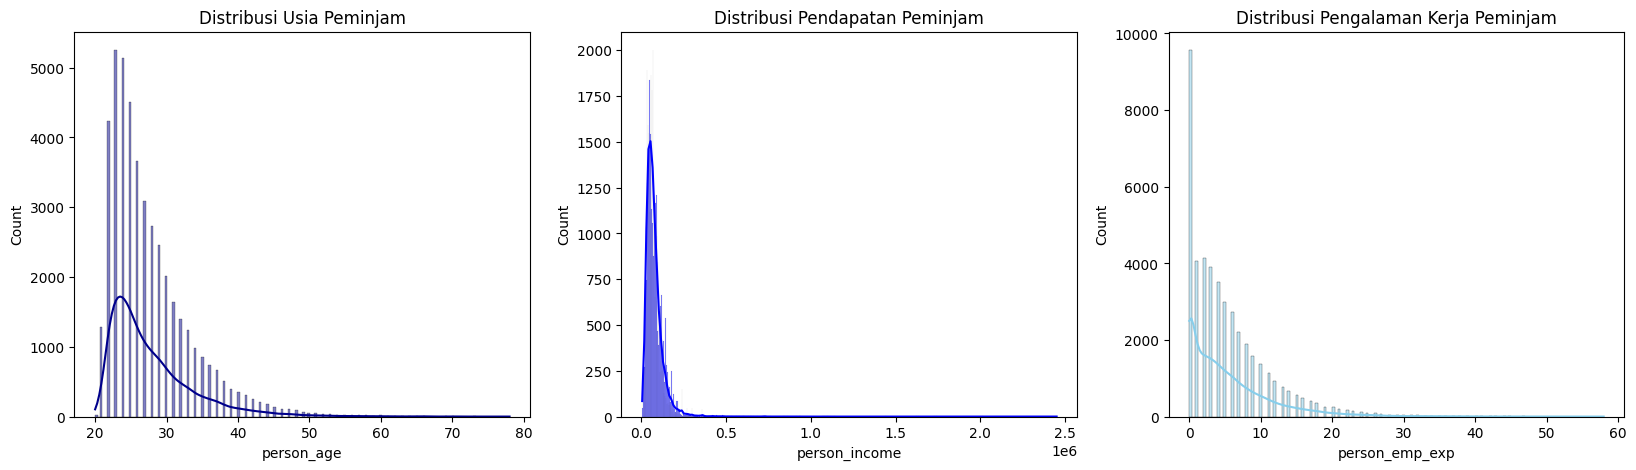

In [15]:
# 1. Distribusi usia, pendapatan, dan pengalaman kerja
fig1, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df['person_age'], kde=True, ax=axes[0], color='darkblue')
axes[0].set_title('Distribusi Usia Peminjam')
sns.histplot(df['person_income'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('Distribusi Pendapatan Peminjam')
sns.histplot(df['person_emp_exp'], kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Distribusi Pengalaman Kerja Peminjam')

1. Distribusi Usia Peminjam
  - Usia peminjam paling banyak berada di rentang 20–30 tahun, dengan puncak sekitar usia 23–25 tahun
  - Setelah usia 30 tahun, frekuensi peminjam menurun tajam.

Mayoritas peminjam berasal dari kalangan usia muda atau early career, yang kemungkinan besar belum memiliki aset besar dan sedang dalam tahap membangun kondisi keuangan.

2. Distribusi Pendapatan Peminjam
  - Distribusi sangat right-skewed (miring ke kanan), artinya Mayoritas peminjam memiliki pendapatan yang relatif rendah hingga menengah.

Sebagian besar peminjam berpendapatan rendah hingga sedang. Data ini menunjukkan bahwa segmen utama pengguna pinjaman berasal dari kelompok ekonomi menengah ke bawah.

3. Distribusi Pengalaman Kerja
  - Paling banyak memiliki pengalaman kerja 0–5 tahun.- Setelah itu, frekuensi menurun seiring bertambahnya tahun pengalaman.

Mayoritas peminjam adalah yang masih dalam fase awal karier atau baru mulai bekerja, yang kemungkinan membutuhkan dana untuk keperluan konsumtif, pendidikan, atau kebutuhan mendesak.

C:\Users\USER\AppData\Local\Temp\ipykernel_6376\3681007757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='person_gender', ax=axes[0], palette='mako', order=df['person_gender'].value_counts().index)
C:\Users\USER\AppData\Local\Temp\ipykernel_6376\3681007757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='person_education', ax=axes[1], palette='mako', order=df['person_education'].value_counts().index)
C:\Users\USER\AppData\Local\Temp\ipykernel_6376\3681007757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.coun

Text(0.5, 1.0, 'Status Kepemilikan Rumah')

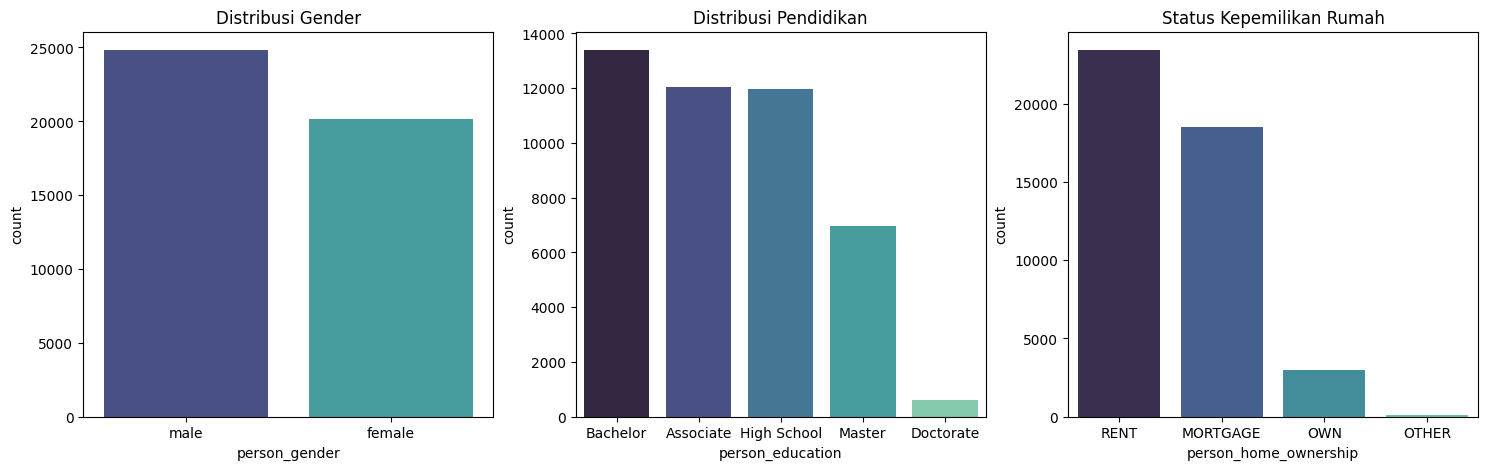

In [16]:
# 2. Komposisi berdasarkan gender, pendidikan, dan kepemilikan rumah
fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='person_gender', ax=axes[0], palette='mako', order=df['person_gender'].value_counts().index)
axes[0].set_title('Distribusi Gender')
sns.countplot(data=df, x='person_education', ax=axes[1], palette='mako', order=df['person_education'].value_counts().index)
axes[1].set_title('Distribusi Pendidikan')
sns.countplot(data=df, x='person_home_ownership', ax=axes[2], palette='mako', order=df['person_home_ownership'].value_counts().index)
axes[2].set_title('Status Kepemilikan Rumah')


1. Distribusi Gender
  - Jumlah peminjam laki-laki ~ 25 ribu orang
  - Jumlah peminjam perempuan ~ 20 ribu orang
  
  Mayoritas peminjam adalah laki-laki. Jumlah peminjam laki-laki lebih banyak sekitar 10% dibanding perempuan.

2. Distribusi Pendidikan
  - Bachelor menjadi tingkat pendidikan terbanyak (~13.500)
  - Diikuti oleh Associate dan High School (masing-masing sekitar 12.000)
  - Master hanya sekitar 7.000 orang
  - Doctorate paling sedikit (kurang dari 1.000)

  Mayoritas peminjam memiliki pendidikan S1 atau lebih rendah, menunjukkan segmen pendidikan menengah ke bawah paling dominan dalam pengajuan pinjaman.

3. Status Kepemilikan Rumah
  - Mayoritas peminjam adalah penyewa (RENT, ~23.000)
  - Diikuti oleh pemilik rumah dengan hipotek (MORTGAGE, ~18.000)
  - Pemilik penuh (OWN) dan kategori lain (OTHER) jumlahnya jauh lebih sedikit

Sebagian besar peminjam tidak memiliki rumah sendiri, mereka menyewa atau masih membayar hipotek. Ini dapat mencerminkan tingkat kestabilan finansial atau aset tetap yang relatif rendah di kalangan peminjam.


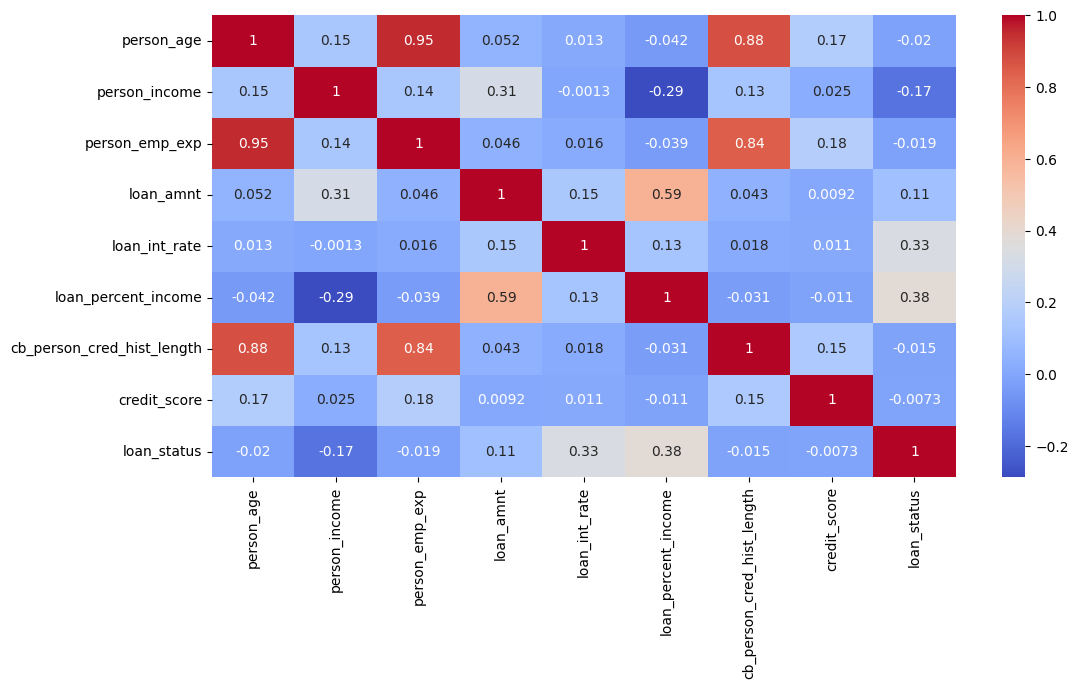

In [17]:
#korelasi antar kolom numerik
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

1. Korelasi Kuat (|r| > 0.7)
  - person_age dengan person_emp_exp: 0.95

    Sangat wajar, semakin tua seseorang, umumnya pengalaman kerja juga bertambah.

  - person_age dengan cb_person_cred_hist_length: 0.88

    Semakin tua seseorang, biasanya semakin panjang juga histori kreditnya.

  - person_emp_exp dengan cb_person_cred_hist_length: 0.84

    Pengalaman kerja yang lama biasanya beriringan dengan panjang histori kredit.

2. Korelasi Sedang (0.3 < |r| < 0.7)

  - loan_amnt dengan person_income: 0.31

    Peminjam dengan pendapatan lebih tinggi cenderung mengajukan pinjaman yang lebih besar.

  - loan_amnt dengan loan_percent_income: 0.59
    
    Korelasinya positif karena jika loan_amnt naik, rasio juga naik (jika person_income konstan).

  - loan_int_rate dengan loan_status: 0.33

    Semakin tinggi suku bunga, kemungkinan gagal bayar cenderung meningkat.

  - loan_percent_income dengan loan_status: 0.38

    Rasio pinjaman terhadap pendapatan yang tinggi lebih berisiko, menyebabkan potensi gagal bayar lebih besar.

3. Korelasi Lemah atau Tidak Signifikan (|r| < 0.3)

  - credit_score hampir tidak berkorelasi dengan loan_status: -0.0073

    Mengejutkan, padahal skor kredit seharusnya relevan — kemungkinan ada non-linear relationship atau masalah data (e.g. skewness, outlier).

  - person_income dengan loan_status: -0.17

    Pendapatan lebih tinggi sedikit menurunkan kemungkinan gagal bayar.


C:\Users\USER\AppData\Local\Temp\ipykernel_6376\3396316504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_intent', palette='mako', order=df['loan_intent'].value_counts().index)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'EDUCATION'),
  Text(1, 0, 'MEDICAL'),
  Text(2, 0, 'VENTURE'),
  Text(3, 0, 'PERSONAL'),
  Text(4, 0, 'DEBTCONSOLIDATION'),
  Text(5, 0, 'HOMEIMPROVEMENT')])

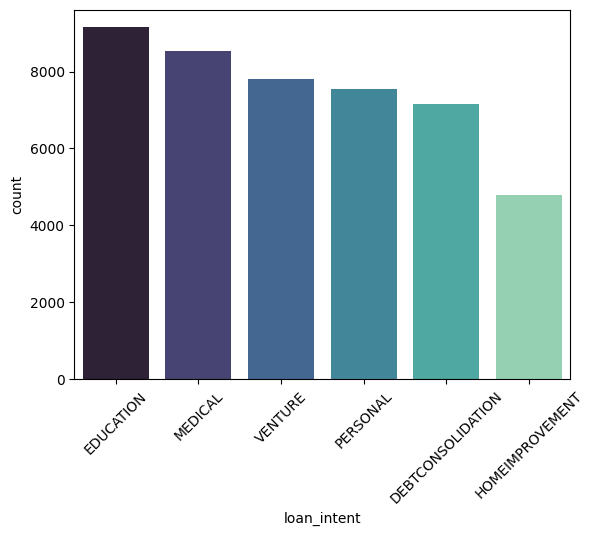

In [18]:
# Distribusi  tujuan mengajukan pinjaman
sns.countplot(data=df, x='loan_intent', palette='mako', order=df['loan_intent'].value_counts().index)
plt.xticks(rotation=45)

1. EDUCATION (Pendidikan)
  - Peminjaman untuk tujuan pendidikan merupakan yang paling umum.
  - Ini bisa menunjukkan bahwa banyak orang mengandalkan pinjaman untuk membiayai sekolah atau kuliah, terutama jika biaya tinggi atau tabungan tidak mencukupi.

2. MEDICAL (Medis)
  - Jumlahnya hampir setara dengan pendidikan.
  - Menunjukkan tingginya kebutuhan masyarakat untuk pembiayaan pengobatan, mungkin karena biaya layanan kesehatan yang mahal atau darurat medis.

3. VENTURE (Usaha/Bisnis)
  - Banyak orang meminjam untuk memulai atau mengembangkan bisnis.

4. PERSONAL
  - Tujuan pribadi, bisa bermacam-macam seperti liburan, pembelian barang, dll.

5. DEBTCONSOLIDATION (Konsolidasi Utang)
  - Digunakan untuk membayar utang lain dan mengonsolidasikannya jadi satu pinjaman.

6. HOMEIMPROVEMENT (Perbaikan Rumah)
  - Jumlahnya paling rendah dibandingkan kategori lain. Bisa jadi karena orang cenderung menunda renovasi atau membiayainya dengan cara lain.



<Axes: xlabel='previous_loan_defaults_on_file', ylabel='count'>

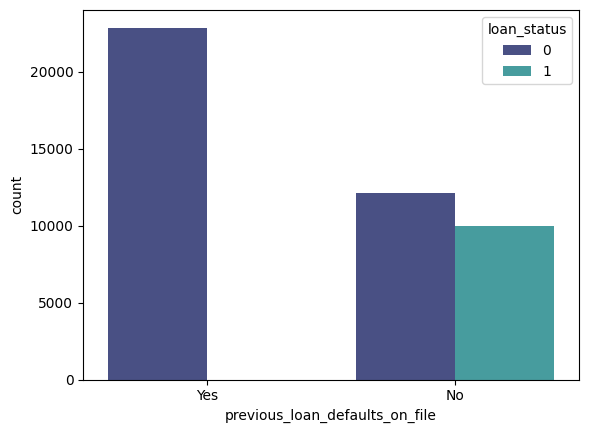

In [19]:
#distribusi previous loan dengan loan status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', palette ='mako', order=df['previous_loan_defaults_on_file'].value_counts().index)


1. Peminjam dengan Riwayat Gagal Bayar (Yes):
  - Semua pinjamannya ditolak (loan_status = 0).
  - Tidak ada satu pun yang disetujui.

  Ini menunjukkan bahwa riwayat gagal bayar sangat berpengaruh terhadap keputusan pemberi pinjaman.

2. Peminjam Tanpa Riwayat Gagal Bayar (No):
  - Mayoritas pengajuan ditolak, tetapi ada yang pengajuan nya disetujui.

  Peminjam tanpa riwayat buruk cenderung lebih dipercaya oleh lembaga keuangan.

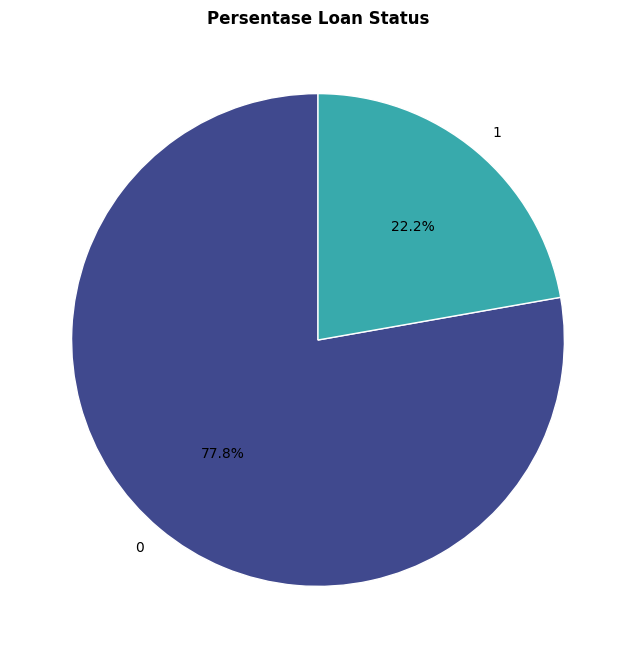

In [20]:
# Hitung persentase
loan_intent_counts = df['loan_status'].value_counts()

# Warna dari palette Seaborn
colors = sns.color_palette('mako', len(loan_intent_counts))

# Pie chart dengan Matplotlib + styling Seaborn
plt.figure(figsize=(8, 8))
plt.pie(
    loan_intent_counts,
    labels=loan_intent_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Persentase Loan Status', fontweight='bold')
plt.show()

1. Sebagian Besar Pinjaman Ditolak
  - Sebanyak 77.8% pengajuan pinjaman berada pada status "0" (Ditolak).
  - Hanya 22.2% pengajuan pinjaman yang disetujui (status "1").

Ini menunjukkan bahwa sistem atau lembaga peminjam memiliki standar kelayakan yang sangat ketat, sehingga sebagian besar pengajuan ditolak.

2. Imbalance Data (Ketidakseimbangan Kelas)
  - Proporsi data tidak seimbang antara pinjaman yang disetujui dan yang ditolak.



<Axes: xlabel='person_gender', ylabel='count'>

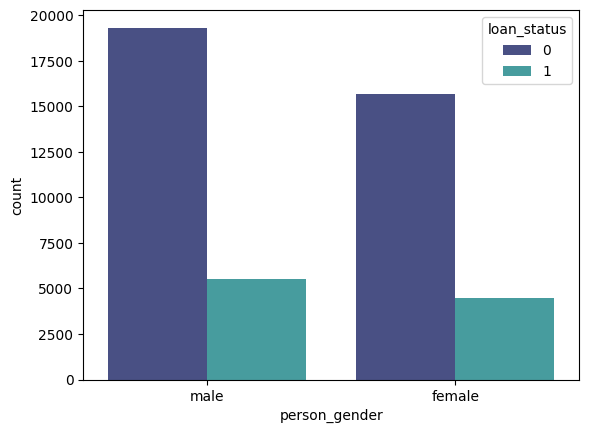

In [21]:
sns.countplot(data=df, x='person_gender', hue='loan_status', palette='mako', order=df['person_gender'].value_counts().index)

1. Jumlah Pengajuan Lebih Banyak dari Laki-laki
  - Baik pinjaman yang disetujui (status = 1) maupun yang ditolak (status = 0), jumlahnya lebih banyak dari peminjam laki-laki dibandingkan perempuan.

2. Rasio Persetujuan antara Gender Hampir Mirip
  - Persentase persetujuan tidak menunjukkan perbedaan yang ekstrem antara laki-laki dan perempuan. Artinya, tidak ada bias signifikan terhadap gender dalam proses pengajuan.

<Axes: xlabel='person_education', ylabel='count'>

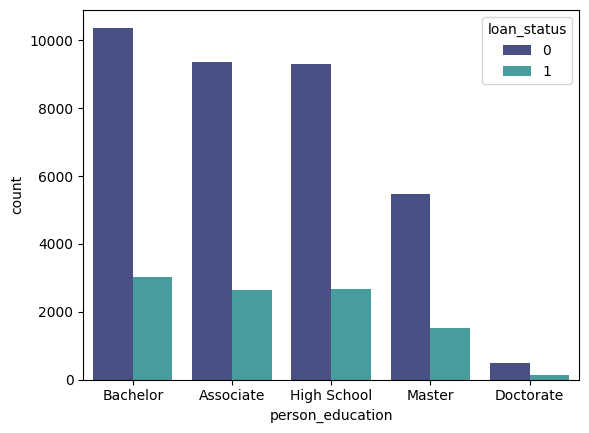

In [22]:
sns.countplot(data=df, x='person_education', hue='loan_status', palette='mako', order=df['person_education'].value_counts().index)

Meskipun jumlah peminjam tertinggi berasal dari lulusan Bachelor, peluang persetujuan pinjaman secara proporsional tampak lebih tinggi pada peminjam dengan pendidikan Associate dan High School. Hal ini mungkin menunjukkan bahwa pendidikan tinggi tidak serta-merta meningkatkan kemungkinan disetujuinya pinjaman.

<Axes: xlabel='person_home_ownership', ylabel='count'>

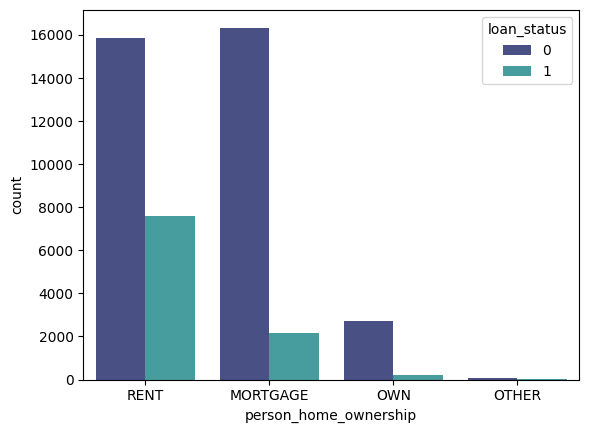

In [23]:
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', palette='mako', order=df['person_home_ownership'].value_counts().index)

Kategori RENT memiliki jumlah persetujuan pinjaman tertinggi secara absolut dan proporsional. Sementara itu, kategori MORTGAGE memiliki jumlah penolakan terbesar. Memiliki rumah tidak menjamin disetujuinya pinjaman, bahkan mungkin diasosiasikan dengan beban cicilan yang tinggi, sehingga lebih berisiko.

# Feature Engineering

Transformasi fitur dilakukan agar data siap untuk dimodelkan:

  - Encoding: Label encoding / one-hot encoding untuk fitur kategorikal
  - Split data : 70% data train dan 30% data test
  - SMOTE: Mengatasi imbalance pada kelas target
  - Scaling: Normalisasi fitur numerik menggunakan StandardScaler

In [24]:
#encode kolom kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [25]:
# cretate predictor variables as X
X = df.drop(['loan_status'], axis = 1)
# create target data as y
y = df['loan_status']

In [26]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [27]:
# drop certain column on train data
column_to_drop = ['person_emp_exp','cb_person_cred_hist_length']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

In [28]:

# check train data dimension
X_train.shape

(31493, 11)

In [29]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
41733,25,0,4,30183,3,4750.0,1,10.40,0.16,620,0
43980,26,1,0,40118,3,4194.0,3,15.89,0.10,632,0
41986,26,1,0,94446,0,15000.0,4,8.35,0.16,702,0
44053,25,1,3,77142,3,20000.0,3,12.18,0.26,627,0
31009,39,1,3,88329,0,10000.0,5,7.51,0.11,643,1


In [30]:
# check test data dimension
X_test.shape

(13497, 11)

In [31]:
# check train target counts
y_train.value_counts()

loan_status
0    24493
1     7000
Name: count, dtype: int64

In [32]:
# check test target counts
y_test.value_counts()

loan_status
0    10497
1     3000
Name: count, dtype: int64

In [33]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)



In [35]:
# Konversi kembali ke DataFrame dengan nama kolom asli
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)


In [36]:
X_train_std.shape, y_train.shape

((48986, 11), (48986,))

# Modeling

Lima model klasifikasi dibangun dan dibandingkan performanya:
  1. Logistic Regression
  2. Random Forest
  3. Multi-Layer Perceptron (MLP)
  4. XGBoost
  5. LightGBM

In [37]:
#define logistic regression model
logreg_clf = LogisticRegression(
    random_state = 1000
)

#fit model to training data
logreg_clf.fit(X_train_std, y_train)

LogisticRegression(random_state=1000)

In [38]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train_std, y_train)

RandomForestClassifier(random_state=1000)

In [39]:
# define MLP model
mlp_clf = MLPClassifier(
    random_state = 1000,
    hidden_layer_sizes = (8,),
    solver = 'sgd'
)

# fit model to training data
mlp_clf.fit(X_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(8,), random_state=1000, solver='sgd')

In [40]:
# define XGB model
xgb_clf = XGBClassifier(
    random_state = 1000
)

# fit model no training data
xgb_clf.fit(X_train_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
# define LGBM model
lgbm_clf = LGBMClassifier(
    random_state=1000,
    n_jobs=-1
)

# fit model no training data
lgbm_clf.fit(X_train_std, y_train)

[LightGBM] [Info] Number of positive: 24493, number of negative: 24493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 48986, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_jobs=-1, random_state=1000)

# Model EValuation

Pada bagian ini, akan dilakukan 2 tahap :
1. Sebelum Tunning

   Semua model akan dievaluasi dengan menggunakan classification report, dimana metrik yang akan digunakan yaitu F1 score.

2. Setelah Tunning

    Berdasarkan tahap sebelumnya, diambil tiga model terbaik berdasrkan f1 score. Selanjutnya, ketiga model tersebut dilakukan hyperparameter tunning menggunakan metode RandomizedSearchCV untuk meningkatkan performa model

## Sebelum Tunning

In [42]:
#logreg prediction
logreg_pred = logreg_clf.predict(X_test_std)
logreg_pred_proba = logreg_clf.predict_proba(X_test_std)

# random forest prediction
rf_pred = random_forest_clf.predict(X_test_std)
rf_pred_proba = random_forest_clf.predict_proba(X_test_std)

# multi-layered perceptron prediction
mlp_pred = mlp_clf.predict(X_test_std)
mlp_pred_proba = mlp_clf.predict_proba(X_test_std)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test_std)
xgb_pred_proba = xgb_clf.predict_proba(X_test_std)

# LGBM prediction
lgbm_pred = lgbm_clf.predict(X_test_std)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test_std)

e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-p

In [43]:
# logistic regression prediction result
pd.DataFrame(metrics.classification_report(y_test, logreg_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.968560,0.629733,0.860488,0.799146,0.893248
recall,0.848147,0.903667,0.860488,0.875907,0.860488
f1-score,0.904363,0.742231,0.860488,0.823297,0.868326
support,10497.000000,3000.000000,0.860488,13497.000000,13497.000000


In [44]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.958558,0.742176,0.902719,0.850367,0.910463
recall,0.914452,0.861667,0.902719,0.888059,0.902719
f1-score,0.935986,0.797470,0.902719,0.866728,0.905198
support,10497.000000,3000.000000,0.902719,13497.000000,13497.000000


In [45]:
# multi-layered perceptron prediction result
pd.DataFrame(metrics.classification_report(y_test, mlp_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964328,0.640798,0.864562,0.802563,0.892416
recall,0.857578,0.889000,0.864562,0.873289,0.864562
f1-score,0.907826,0.744764,0.864562,0.826295,0.871582
support,10497.000000,3000.000000,0.864562,13497.000000,13497.000000


In [46]:

# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.962726,0.787324,0.919464,0.875025,0.923739
recall,0.932552,0.873667,0.919464,0.903109,0.919464
f1-score,0.947399,0.828251,0.919464,0.887825,0.920916
support,10497.000000,3000.000000,0.919464,13497.000000,13497.000000


In [47]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, lgbm_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.962270,0.748359,0.90672,0.855315,0.914724
recall,0.915976,0.874333,0.90672,0.895155,0.906720
f1-score,0.938552,0.806457,0.90672,0.872504,0.909191
support,10497.000000,3000.000000,0.90672,13497.000000,13497.000000


## Setelah Tunning

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=1000)


# XGBoost
xgb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_model = XGBClassifier(random_state=1000)

# LightGBM
lgbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63]
}

lgbm_model = LGBMClassifier(random_state=1000)



In [49]:
# Tuning Random Forest
rf_search = RandomizedSearchCV(rf_model, rf_params, cv=5, scoring='f1')
rf_search.fit(X_train_std, y_train)

# Tuning XGBoost
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, cv=5, scoring='f1')
xgb_search.fit(X_train_std, y_train)

# Tuning LightGBM
lgbm_search = RandomizedSearchCV(lgbm_model, lgbm_params, cv=5, scoring='f1')
lgbm_search.fit(X_train_std, y_train)



[LightGBM] [Info] Number of positive: 19594, number of negative: 19594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 39188, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19595, number of negative: 19594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 39189, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.0

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=1000),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [50, 100, 150],
                                        'num_leaves': [15, 31, 63]},
                   scoring='f1')

In [50]:
from sklearn.metrics import f1_score

# Prediksi Tunning
xgb_best = xgb_search.best_estimator_
lgbm_best = lgbm_search.best_estimator_
rf_best = rf_search.best_estimator_

# RF prediction
rf_pred = rf_best.predict(X_test_std)
rf_pred_proba =rf_best.predict_proba(X_test_std)

# XGBoost prediction
xgb_pred = xgb_best.predict(X_test_std)
xgb_pred_proba = xgb_best.predict_proba(X_test_std)

# LGBM prediction
lgbm_pred = lgbm_best.predict(X_test_std)
lgbm_pred_proba = lgbm_best.predict_proba(X_test_std)



# F1 Score comparison
print("F1-score Random Forest (tuned):", f1_score(y_test, rf_pred))
print("F1-score XGBoost (tuned):", f1_score(y_test, xgb_pred))
print("F1-score LightGBM (tuned):", f1_score(y_test, lgbm_pred))



e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


F1-score Random Forest (tuned): 0.7861341371514695
F1-score XGBoost (tuned): 0.8234005944001253
F1-score LightGBM (tuned): 0.8298450231666401


#Model Selection

Model terbaik dipilih berdasarkan hasil evaluasi setelah tuning. Pada proyek ini, XGBoost terpilih sebagai model terbaik karena memberikan kombinasi kinerja optimal dari segi akurasi, recall, f1-score, dan area under ROC curve.

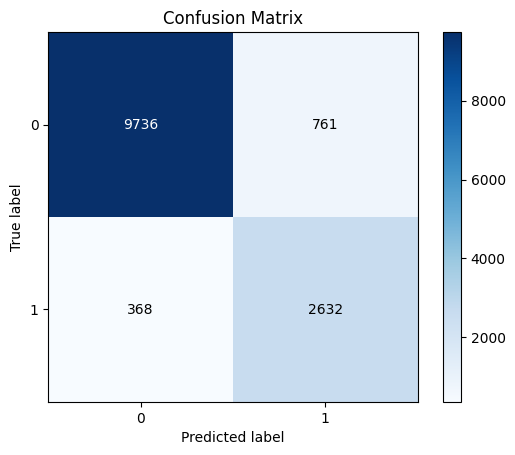

In [51]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

Berdasarkan hasil confusion matrix model XGBoost:

- True Negative (TN): 9815 — Model berhasil memprediksi pinjaman yang ditolak dengan benar.
- False Positive (FP): 682 — Model salah memprediksi pinjaman sebagai disetujui, padahal sebenarnya ditolak.
- False Negative (FN): 385 — Model salah memprediksi pinjaman sebagai ditolak, padahal sebenarnya disetujui.
- True Positive (TP): 2615 — Model berhasil memprediksi pinjaman yang disetujui dengan benar.

e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


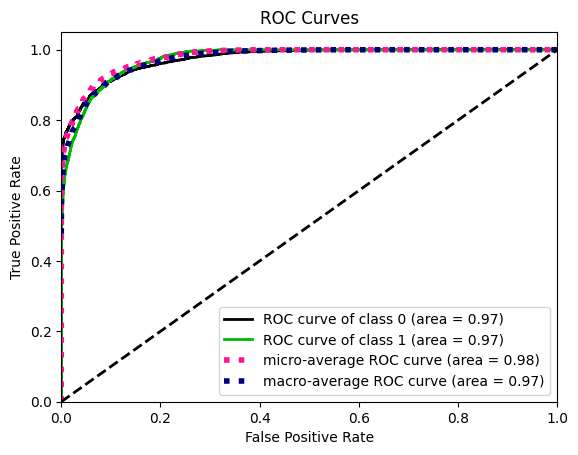

In [52]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

Grafik menunjukkan ROC AUC (Area Under Curve) untuk class 0 dan class 1 adalah 0.98
- Nilai 0.98 sangat tinggi, mendekati 1.0, menunjukkan model sangat baik dalam membedakan nasabah yang berisiko dan yang tidak.
- Nilai 0.98 artinya Jika kita ambil satu nasabah yang benar-benar gagal bayar dan satu yang tidak, maka ada 98% kemungkinan bahwa model akan memberikan skor risiko yang lebih tinggi pada nasabah yang gagal bayar.

In [53]:
## initiate explainer for XGBoost model
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)

# Masukkan ke explainer
loan_xgb_exp = dx.Explainer(xgb_best, X_train_std_df, y_train, label="XGBoost Interpretation")


Preparation of a new explainer is initiated

  -> data              : 48986 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 48986 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x000002666459B1A0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.5e-06, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.989, mean = 9.39e-07, max = 0.963
  -> model_info        : package xgboost

A new explainer has been created!


#Feature Importance

Menggunakan interpretasi berbasis XGBoost, dilakukan visualisasi feature importance untuk mengetahui fitur-fitur yang paling berpengaruh terhadap prediksi loan default.

In [56]:
# visualize permutation feature importance for XGBoost model
loan_xgb_exp.model_parts().plot()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Model sangat bergantung pada fitur yang menunjukkan risiko historis (default), tekanan finansial (persentase pinjaman), dan parameter ekonomi personal (income, interest).



# Partial Dependence Plot

Plot PDP digunakan untuk memahami bagaimana perubahan pada nilai suatu fitur mempengaruhi probabilitas loan default.

In [55]:
#PDP untuk masing-masing fitur penting
variable = ['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate','person_income', 'person_home_ownership', 'loan_intent', 'loan_amnt', 'credit_score', 'person_age', 'person_education']
loan_xgb_exp.model_profile(variables=variable).plot()


Calculating ceteris paribus: 100%|██████████| 10/10 [00:02<00:00,  4.92it/s]
e:\DIBIMBING\FPDS_Streamlit\env\Lib\site-packages\dalex\model_explanations\_aggregated_profiles\utils.py:144: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.69655534 -0.67523342 -0.65391151 ...  1.39299229  1.4143142
  1.43563611]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

a. previous_loan_defaults_on_file
Grafik menunjukkan lonjakan prediksi ketika ada riwayat gagal bayar pinjaman sebelumnya.

Artinya: Jika seseorang memiliki catatan gagal bayar sebelumnya, probabilitas default menurut model meningkat signifikan.

→ Fitur ini paling berpengaruh dalam prediksi!

b. loan_percent_income
Saat persentase pinjaman terhadap pendapatan naik, risiko default juga naik.

→ Semakin besar beban pinjaman terhadap penghasilan, semakin tinggi risiko default.

c. loan_int_rate
Kenaikan suku bunga pinjaman berkorelasi positif dengan probabilitas default.

→ Suku bunga tinggi cenderung diberikan ke debitur berisiko, atau menyebabkan beban finansial lebih besar.

d. person_income
Semakin tinggi penghasilan, cenderung menurunkan risiko gagal bayar.

→ Pendapatan tinggi diasosiasikan dengan kemampuan bayar lebih baik.

e. credit_score
Semakin tinggi skor kredit, semakin kecil risiko default (kurva menurun).

→ Sesuai ekspektasi: credit score mencerminkan kredibilitas keuangan.

f. Fitur lain (home ownership, loan intent, education, dll)
Pengaruhnya relatif lebih kecil terhadap prediksi model (lebih datar), meskipun tetap relevan.

In [57]:
import joblib

# === Simpan model XGBoost dengan format resmi (bukan pickle) ===
xgb_best.save_model('xgb_model.json')

# === Simpan scaler dan label encoders seperti biasa ===
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Model dan preprocessing tools berhasil disimpan!")


Model dan preprocessing tools berhasil disimpan!
